In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
import os
from pydataset import data
from scipy import stats
from acquire import get_titanic_data, get_iris_data, get_telco_data
import prepare

pd.set_option('display.max_columns',None) #pd.set_option('display.max_rows',None)

# Data Acquisition 

### Use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

In [2]:
df_iris = data('iris')
#iris = sns.load_dataset('iris') #from seaborn 

In [3]:
#Learn more about iris dataset
data('iris', show_doc=True)

iris

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Edgar Anderson's Iris Data

### Description

This famous (Fisher's or Anderson's) iris data set gives the measurements in
centimeters of the variables sepal length and width and petal length and
width, respectively, for 50 flowers from each of 3 species of iris. The
species are _Iris setosa_, _versicolor_, and _virginica_.

### Usage

    iris
    iris3

### Format

`iris` is a data frame with 150 cases (rows) and 5 variables (columns) named
`Sepal.Length`, `Sepal.Width`, `Petal.Length`, `Petal.Width`, and `Species`.

`iris3` gives the same data arranged as a 3-dimensional array of size 50 by 4
by 3, as represented by S-PLUS. The first dimension gives the case number
within the species subsample, the second the measurements with names `Sepal
L.`, `Sepal W.`, `Petal L.`, and `Petal W.`, and the third the species.

### Source

Fisher, R. A. (1936) The use of multiple measurements in taxonomi

### print the first 3 rows

In [4]:
df_iris.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


### print the number of rows and columns (shape)

In [5]:
df_iris.shape

(150, 5)

### print the column names

In [6]:
df_iris.columns
#df_iris.columns.to_list() #append the columns to a list

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

### print the data type of each column

In [8]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


### print the summary statistics for each of the numeric variables

In [10]:
stats = df_iris.describe().T
stats

,count,mean,std,min,25%,50%,75%,max
Sepal.Length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
Sepal.Width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
Petal.Length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
Petal.Width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


## Read the Table1_CustDetails table from your spreadsheet exercises google sheet into a dataframe named df_google_sheets.

In [47]:
df_google_sheets_sample =pd.read_csv('CustDetails.csv')

### assign the first 100 rows to a new dataframe, df_excel_sample

In [48]:
df_google_sheets_sample.head(100)

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,...,has_phone_and_internet,partner_dependents,tenure,average_monthly,phone_services_description,internet_services_description,contact_type_description,tenure_month,service_types,tenure_years
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.60,...,True,3,9.044207,65.52114676,One Line,DSL,1 Year,9,Phone and Internet,< 1 year
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.90,...,True,0,9.055092,142.7215952,Two or More Lines,DSL,Month-to-Month,9,Phone and Internet,< 1 year
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.90,...,True,0,3.800406,22.23476189,One Line,Fiber Optic,Month-to-Month,4,Phone and Internet,< 1 year
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.00,...,True,1,12.631122,388.3904824,One Line,Fiber Optic,Month-to-Month,13,Phone and Internet,2 years
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.90,...,True,1,3.187128,32.47451221,One Line,Fiber Optic,Month-to-Month,3,Phone and Internet,< 1 year
5,0013-MHZWF,Female,0,No,Yes,1,1,0,Credit card (automatic),69.40,...,True,2,8.234150,7.930931461,One Line,DSL,Month-to-Month,8,Phone and Internet,< 1 year
6,0013-SMEOE,Female,1,Yes,No,1,2,2,Bank transfer (automatic),109.70,...,True,1,72.053327,124.4179334,One Line,Fiber Optic,2 Year,72,Phone and Internet,More than 5 years
7,0014-BMAQU,Male,0,Yes,No,2,2,2,Credit card (automatic),84.65,...,True,1,63.529829,761.5982371,Two or More Lines,Fiber Optic,2 Year,64,Phone and Internet,5 years
8,0015-UOCOJ,Female,1,No,No,1,1,0,Electronic check,48.20,...,True,0,7.061203,5.167031588,One Line,DSL,Month-to-Month,7,Phone and Internet,< 1 year
9,0016-QLJIS,Female,0,Yes,Yes,2,1,2,Mailed check,90.45,...,True,3,65.869541,109.4458881,Two or More Lines,DSL,2 Year,66,Phone and Internet,5 years


### print the number of rows of your original dataframe

In [49]:
df_google_sheets_sample.shape[0]

7049

### print the first 5 column names

In [51]:
df_google_sheets_sample.columns[:5]

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents'], dtype='object')

### print the column names that have a data type of object

In [52]:
df_excel.select_dtypes(include = "object").columns

Index(['customer_id', 'gender', 'partner', 'dependents', 'payment_type',
       'churn'],
      dtype='object')

### compute the range for each of the numeric variables.

In [53]:
df_excel.select_dtypes(include = "number").max() - df_excel.select_dtypes(include = "number").min()

is_senior_citizen       1.0
phone_service           2.0
internet_service        2.0
contract_type           2.0
monthly_charges       100.5
total_charges        8666.0
dtype: float64

## Download your spreadsheet exercises google sheet as an excel file (File → Download → Microsoft Excel). Read the Table1_CustDetails worksheet into a dataframe named df_excel.

In [11]:
df_excel = pd.read_excel('CustDetails exercises.xlsx')

### assign the first 100 rows to a new dataframe, df_excel_sample

In [44]:
df_excel.sample(100)

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn
4803,6752-APNJL,Male,0.0,Yes,Yes,1.0,1.0,0.0,Mailed check,54.50,2301.15,No
3909,5499-ECUTN,Female,0.0,Yes,No,1.0,1.0,1.0,Credit card (automatic),66.05,3021.45,No
3600,5110-CHOPY,Female,0.0,No,No,0.0,1.0,2.0,Electronic check,53.60,3237.05,No
178,0289-IVARM,Female,0.0,No,No,1.0,1.0,0.0,Electronic check,60.55,1982.60,No
2270,3247-MHJKM,Male,0.0,No,No,1.0,0.0,0.0,Mailed check,20.20,20.20,No
1958,2834-JRTUA,Male,0.0,No,No,2.0,2.0,2.0,Electronic check,108.05,7532.15,Yes
4817,6773-LQTVT,Female,1.0,Yes,Yes,0.0,1.0,0.0,Mailed check,35.65,1025.15,No
1838,2674-MIAHT,Female,0.0,No,No,2.0,2.0,0.0,Mailed check,80.30,324.20,No
4903,6904-JLBGY,Female,1.0,No,No,2.0,2.0,2.0,Credit card (automatic),117.35,8436.25,No
6454,9136-ALYBR,Male,0.0,No,No,0.0,1.0,0.0,Mailed check,24.45,24.45,Yes


### print the number of rows of your original dataframe

In [14]:
df_excel.shape[0]

7049

### print the first 5 column names

In [15]:
df_excel.columns[:5]

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents'], dtype='object')

### print the column names that have a data type of object

In [16]:
df_excel.select_dtypes(include = "object").columns

Index(['customer_id', 'gender', 'partner', 'dependents', 'payment_type',
       'churn'],
      dtype='object')

In [17]:
df_excel.select_dtypes(include = "number").columns

Index(['is_senior_citizen', 'phone_service', 'internet_service',
       'contract_type', 'monthly_charges', 'total_charges'],
      dtype='object')

### compute the range for each of the numeric variables.

In [18]:
df_excel.select_dtypes(include = "number").max() - df_excel.select_dtypes(include = "number").min()

is_senior_citizen       1.0
phone_service           2.0
internet_service        2.0
contract_type           2.0
monthly_charges       100.5
total_charges        8666.0
dtype: float64

## Read the data from this google sheet into a dataframe, df_google.

### print the first 3 rows

In [46]:
spreadsheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'
csv_export = spreadsheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df_google = pd.read_csv(csv_export)
df_google.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### print the number of rows and columns

In [27]:
df_google.shape

(891, 12)

### print the column names

In [28]:
df_google.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### print the data type of each column

In [29]:
df_google.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### print the summary statistics for each of the numeric variables

In [30]:
df_google.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [31]:
df_google.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


### print the unique values for each of your categorical variables

In [36]:
df_obj_only = df_google.select_dtypes(include='object')
for i in df_obj_only.columns:
     print(df_google[i].unique())

['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'Moran, Mr. James' 'McCarthy, Mr. Timothy J'
 'Palsson, Master. Gosta Leonard'
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'
 'Nasser, Mrs. Nicholas (Adele Achem)' 'Sandstrom, Miss. Marguerite Rut'
 'Bonnell, Miss. Elizabeth' 'Saundercock, Mr. William Henry'
 'Andersson, Mr. Anders Johan' 'Vestrom, Miss. Hulda Amanda Adolfina'
 'Hewlett, Mrs. (Mary D Kingcome) ' 'Rice, Master. Eugene'
 'Williams, Mr. Charles Eugene'
 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)'
 'Masselmani, Mrs. Fatima' 'Fynney, Mr. Joseph J' 'Beesley, Mr. Lawrence'
 'McGowan, Miss. Anna "Annie"' 'Sloper, Mr. William Thompson'
 'Palsson, Miss. Torborg Danira'
 'Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)'
 'Emir, Mr. Farred Chehab' 'Fortune, Mr. Charles Alexander'
 'O\'Dwyer, Miss. Ellen "Nellie"' 'Todoro

# Data Preparation

## Using the Iris Data:

### Use the function defined in acquire.py to load the iris data.

### Drop the species_id and measurement_id columns.

In [14]:
iris_df = get_iris_data()
iris_df.head(5)

,species_id,species_name,measurement_id,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,1,5.1,3.5,1.4,0.2
1,1,setosa,2,4.9,3.0,1.4,0.2
2,1,setosa,3,4.7,3.2,1.3,0.2
3,1,setosa,4,4.6,3.1,1.5,0.2
4,1,setosa,5,5.0,3.6,1.4,0.2


In [33]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   species_id      150 non-null    int64  
 1   species_name    150 non-null    object 
 2   measurement_id  150 non-null    int64  
 3   sepal_length    150 non-null    float64
 4   sepal_width     150 non-null    float64
 5   petal_length    150 non-null    float64
 6   petal_width     150 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 9.4+ KB


In [15]:
new_iris_df = iris_df.drop(columns = ['species_id', 'measurement_id'])
new_iris_df.head(5)

,species_name,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2


### Rename the species_name column to just species.

In [16]:
new_iris_df.rename(columns={'species_name':'species'},inplace=True)
new_iris_df.head(5)

,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2


### Create dummy variables of the species name and concatenate onto the iris dataframe. (This is for practice, we don't always have to encode the target, but if we used species as a feature, we would need to encode it).

In [17]:
dummy_df = pd.get_dummies(new_iris_df[['species']],dummy_na=False,drop_first=[True, True])
dummy_df.head()

,species_versicolor,species_virginica
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [19]:
new_iris_df = pd.concat([new_iris_df, dummy_df],axis=1)
new_iris_df.head()

,species,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
0,setosa,5.1,3.5,1.4,0.2,0,0
1,setosa,4.9,3.0,1.4,0.2,0,0
2,setosa,4.7,3.2,1.3,0.2,0,0
3,setosa,4.6,3.1,1.5,0.2,0,0
4,setosa,5.0,3.6,1.4,0.2,0,0


### Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [18]:
#Create Iris_df variable and then call the function from acquire.py 
def prep_iris(iris_df):
    
    #Drop the species_id and measurement_id columns
    new_iris_df = iris_df.drop(columns = ['species_id', 'measurement_id'])
    
    #Rename the species_name to species
    new_iris_df.rename(columns={'species_name':'species'},inplace=True)
    
    #Create a dummy data frame and then join dummy_df with new_iris_df
    dummy_df = pd.get_dummies(new_iris_df[['species']],dummy_na=False,drop_first=[True, True])
    new_iris_df = pd.concat([new_iris_df, dummy_df],axis=1)
    
    return new_iris_df

In [34]:
prep_iris(iris_df).head()

,species,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
0,setosa,5.1,3.5,1.4,0.2,0,0
1,setosa,4.9,3.0,1.4,0.2,0,0
2,setosa,4.7,3.2,1.3,0.2,0,0
3,setosa,4.6,3.1,1.5,0.2,0,0
4,setosa,5.0,3.6,1.4,0.2,0,0


## Using the Titanic dataset

### Use the function defined in acquire.py to load the Titanic data.

In [36]:
titanic_df = get_titanic_data()
titanic_df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [37]:
titanic_df.info() #deck, age, embarked and embark_town are missing a lot of value

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   sex           891 non-null    object 
 4   age           714 non-null    float64
 5   sibsp         891 non-null    int64  
 6   parch         891 non-null    int64  
 7   fare          891 non-null    float64
 8   embarked      889 non-null    object 
 9   class         891 non-null    object 
 10  deck          203 non-null    object 
 11  embark_town   889 non-null    object 
 12  alone         891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 97.5+ KB


In [42]:
#Check for missing value
miss_values = titanic_df.isnull().sum()
miss_values[miss_values>0]

age            177
embarked         2
deck           688
embark_town      2
dtype: int64

### Drop any unnecessary, unhelpful, or duplicated columns.

In [58]:
new_titanic_df = titanic_df.drop(columns = ['passenger_id','embarked','pclass','deck','age'])

In [59]:
new_titanic_df['embark_town'] = new_titanic_df.embark_town.fillna(value='Southampton')

### Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

In [67]:
dummy_df = pd.get_dummies(new_titanic_df[['sex','embark_town']],dummy_na=False,drop_first=[True,True])
dummy_df.head()

,sex_male,embark_town_Queenstown,embark_town_Southampton
0,1,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,1,0,1


In [61]:
new_titanic_df = pd.concat([new_titanic_df, dummy_df],axis=1)
new_titanic_df.head()

,survived,sex,sibsp,parch,fare,class,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,male,1,0,7.2500,Third,Southampton,0,1,0,1
1,1,female,1,0,71.2833,First,Cherbourg,0,0,0,0
2,1,female,0,0,7.9250,Third,Southampton,1,0,0,1
3,1,female,1,0,53.1000,First,Southampton,0,0,0,1
4,0,male,0,0,8.0500,Third,Southampton,1,1,0,1


### Create a function named prep_titanic that accepts the raw titanic data, and returns the data with the transformations above applied.

In [54]:
def prep_titanic(titanic_df):
    
    #Drop duplicates and unnecessary columns 
    new_titanic_df = titanic_df.drop(columns = ['passenger_id','embarked','pclass','deck','age'])
    
    #Fill empty value with southampton
    new_titanic_df['embark_town'] = new_titanic_df.embark_town.fillna(value='Southampton')
    
    #Create dummy dataframe and join it with new_titanic_df
    dummy_df = pd.get_dummies(new_titanic_df[['sex','embark_town']],dummy_na=False,drop_first=[True,True])
    new_titanic_df = pd.concat([new_titanic_df, dummy_df],axis=1)
    
    return new_titanic_df

## Using the Telco dataset

### Use the function defined in acquire.py to load the Telco data.

In [2]:
telco_df = get_telco_data()
telco_df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,contract_type_id.1,contract_type,payment_type_id.1,payment_type,internet_service_type_id.1,internet_service_type
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,Yes,No,Yes,Yes,No,2,Yes,2,65.6,593.3,No,2,One year,2,Mailed check,1,DSL
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,No,No,No,No,Yes,1,No,2,59.9,542.4,No,1,Month-to-month,2,Mailed check,1,DSL
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,No,Yes,No,No,No,1,Yes,1,73.9,280.85,Yes,1,Month-to-month,1,Electronic check,2,Fiber optic
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,Yes,Yes,No,Yes,Yes,1,Yes,1,98.0,1237.85,Yes,1,Month-to-month,1,Electronic check,2,Fiber optic
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,No,No,Yes,Yes,No,1,Yes,2,83.9,267.4,Yes,1,Month-to-month,2,Mailed check,2,Fiber optic


In [101]:
telco_df.info() # No null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_id                 7043 non-null   object 
 1   gender                      7043 non-null   object 
 2   senior_citizen              7043 non-null   int64  
 3   partner                     7043 non-null   object 
 4   dependents                  7043 non-null   object 
 5   tenure                      7043 non-null   int64  
 6   phone_service               7043 non-null   object 
 7   multiple_lines              7043 non-null   object 
 8   internet_service_type_id    7043 non-null   int64  
 9   online_security             7043 non-null   object 
 10  online_backup               7043 non-null   object 
 11  device_protection           7043 non-null   object 
 12  tech_support                7043 non-null   object 
 13  streaming_tv                7043 

### Drop any unnecessary, unhelpful, or duplicated columns. This could mean dropping foreign key columns but keeping the corresponding string values, for example.

In [16]:
new_telco_df = telco_df.drop(columns = ['customer_id','contract_type_id.1','payment_type_id.1','internet_service_type_id.1'])

In [17]:
#new_telco_df['total_charges'] = pd.to_numeric(new_telco_df['total_charges'],errors ='coerce')
new_telco_df['total_charges'] = new_telco_df.total_charges.replace(' ', np.nan).astype(float)

In [18]:
new_telco_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gender                    7043 non-null   object 
 1   senior_citizen            7043 non-null   int64  
 2   partner                   7043 non-null   object 
 3   dependents                7043 non-null   object 
 4   tenure                    7043 non-null   int64  
 5   phone_service             7043 non-null   object 
 6   multiple_lines            7043 non-null   object 
 7   internet_service_type_id  7043 non-null   int64  
 8   online_security           7043 non-null   object 
 9   online_backup             7043 non-null   object 
 10  device_protection         7043 non-null   object 
 11  tech_support              7043 non-null   object 
 12  streaming_tv              7043 non-null   object 
 13  streaming_movies          7043 non-null   object 
 14  contract

In [19]:
new_telco_df.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,contract_type,payment_type,internet_service_type
0,Female,0,Yes,Yes,9,Yes,No,1,No,Yes,No,Yes,Yes,No,2,Yes,2,65.6,593.30,No,One year,Mailed check,DSL
1,Male,0,No,No,9,Yes,Yes,1,No,No,No,No,No,Yes,1,No,2,59.9,542.40,No,Month-to-month,Mailed check,DSL
2,Male,0,No,No,4,Yes,No,2,No,No,Yes,No,No,No,1,Yes,1,73.9,280.85,Yes,Month-to-month,Electronic check,Fiber optic
3,Male,1,Yes,No,13,Yes,No,2,No,Yes,Yes,No,Yes,Yes,1,Yes,1,98.0,1237.85,Yes,Month-to-month,Electronic check,Fiber optic
4,Female,1,Yes,No,3,Yes,No,2,No,No,No,Yes,Yes,No,1,Yes,2,83.9,267.40,Yes,Month-to-month,Mailed check,Fiber optic


### Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

In [20]:
obj_col = new_telco_df.select_dtypes(include = "object").columns
obj_col

Index(['gender', 'partner', 'dependents', 'phone_service', 'multiple_lines',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'paperless_billing', 'churn',
       'contract_type', 'payment_type', 'internet_service_type'],
      dtype='object')

In [21]:
for col in obj_col:
    dummy_df = pd.get_dummies(new_telco_df[[col]],dummy_na=False,drop_first=[True,True])
    new_telco_df = pd.concat([new_telco_df, dummy_df],axis=1)
    new_telco_df = new_telco_df.drop(columns=[col])

In [22]:
new_telco_df.head()

,senior_citizen,tenure,internet_service_type_id,contract_type_id,payment_type_id,monthly_charges,total_charges,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,internet_service_type_Fiber optic,internet_service_type_None
0,0,9,1,2,2,65.6,593.30,0,1,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0
1,0,9,1,1,2,59.9,542.40,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,0,4,2,1,1,73.9,280.85,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0
3,1,13,2,1,1,98.0,1237.85,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,1,1,0,0,0,1,0,1,0
4,1,3,2,1,2,83.9,267.40,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,1,1,0


### Create a function named prep_telco that accepts the raw telco data, and returns the data with the transformations above applied.

In [90]:
def prep_telco(telco_df):
    
    #Drop unnecassary columns
    new_telco_df = telco_df.drop(columns = ['customer_id','contract_type_id.1','payment_type_id.1','internet_service_type_id.1'])
    
    #Change the total_charges from object type to float type
    new_telco_df['total_charges'] = new_telco_df.total_charges.replace(' ', np.nan).astype(float)
    
    #Encode the catergoical columns
    obj_col = new_telco_df.select_dtypes(include = "object").columns
    
    for col in obj_col:
        dummy_df = pd.get_dummies(new_telco_df[[col]],dummy_na=False,drop_first=[True,True])
        new_telco_df = pd.concat([new_telco_df, dummy_df],axis=1)
        new_telco_df = new_telco_df.drop(columns=[col])
    
    return new_telco_df

# Exploratory Analysis

## Section 1 - iris_db: Using iris data from our mySQL server and the methods used in the lesson above:

### Acquire, prepare & split your data.

### Univariate Stats

    For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

    For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

    Document takeaways & any actions.

In [39]:
#Acquire data
iris_df = get_iris_data()
iris_df.head()

,species_id,species_name,measurement_id,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,1,5.1,3.5,1.4,0.2
1,1,setosa,2,4.9,3.0,1.4,0.2
2,1,setosa,3,4.7,3.2,1.3,0.2
3,1,setosa,4,4.6,3.1,1.5,0.2
4,1,setosa,5,5.0,3.6,1.4,0.2


In [40]:
#Prepare data
iris_prep = prepare.prep_iris(iris_df)
iris_prep.head()

,species,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
0,setosa,5.1,3.5,1.4,0.2,0,0
1,setosa,4.9,3.0,1.4,0.2,0,0
2,setosa,4.7,3.2,1.3,0.2,0,0
3,setosa,4.6,3.1,1.5,0.2,0,0
4,setosa,5.0,3.6,1.4,0.2,0,0


In [41]:
#Split data using split function from prepare.py
iris_train, iris_validate, iris_test = prepare.iris_split_data(iris_prep)

In [42]:
iris_train.shape, iris_validate.shape, iris_test.shape

((84, 7), (36, 7), (30, 7))

In [43]:
iris_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 79 to 73
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   species             84 non-null     object 
 1   sepal_length        84 non-null     float64
 2   sepal_width         84 non-null     float64
 3   petal_length        84 non-null     float64
 4   petal_width         84 non-null     float64
 5   species_versicolor  84 non-null     uint8  
 6   species_virginica   84 non-null     uint8  
dtypes: float64(4), object(1), uint8(2)
memory usage: 4.1+ KB


In [62]:
quantitative_var = iris_train.select_dtypes('float64')

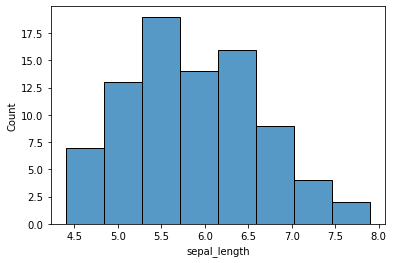

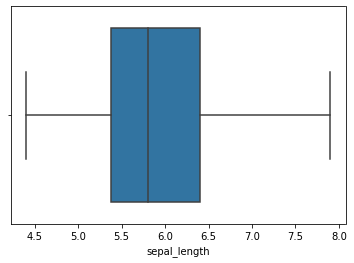

count    84.000000
mean      5.870238
std       0.769099
min       4.400000
25%       5.375000
50%       5.800000
75%       6.400000
max       7.900000
Name: sepal_length, dtype: float64


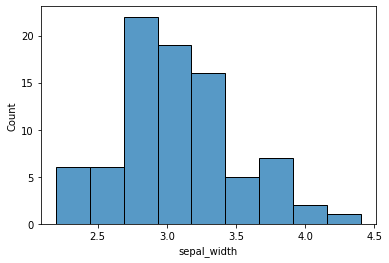

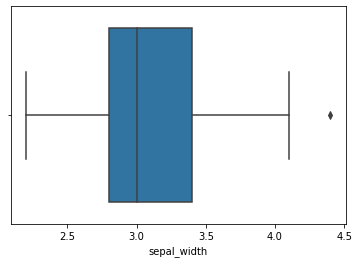

count    84.000000
mean      3.075000
std       0.448256
min       2.200000
25%       2.800000
50%       3.000000
75%       3.400000
max       4.400000
Name: sepal_width, dtype: float64


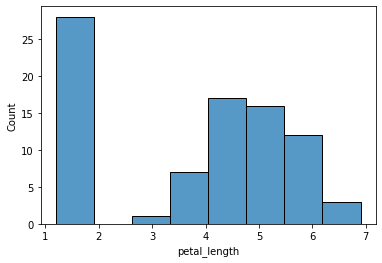

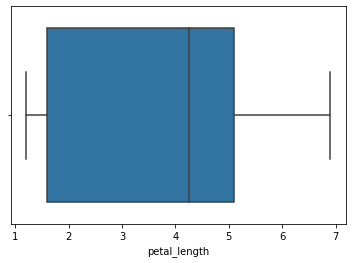

count    84.000000
mean      3.771429
std       1.734940
min       1.200000
25%       1.600000
50%       4.250000
75%       5.100000
max       6.900000
Name: petal_length, dtype: float64


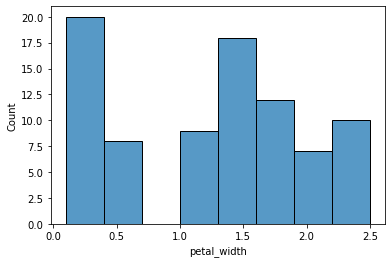

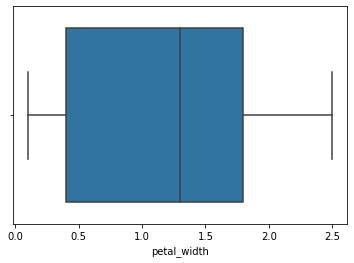

count    84.000000
mean      1.203571
std       0.752577
min       0.100000
25%       0.400000
50%       1.300000
75%       1.800000
max       2.500000
Name: petal_width, dtype: float64


In [66]:
for col in quantitative_var:
    sns.histplot(iris_train[col])
    plt.show()
    
    sns.boxplot(iris_train[col])
    plt.show()
    
    print(iris_train[col].describe())

In [117]:
categorical_var = [col for col in iris_train.columns[iris_train.dtypes =='float64']]

In [126]:
for col in categorical_var:
    print('-------------------------------------------------------------------')
    print (col)
    print(iris_train.groupby(by='species')[col].describe())

-------------------------------------------------------------------
sepal_length
            count      mean       std  min    25%   50%    75%  max
species                                                            
setosa       28.0  5.089286  0.360390  4.4  4.875  5.00  5.400  5.8
versicolor   28.0  5.896429  0.425556  4.9  5.600  5.80  6.125  6.9
virginica    28.0  6.625000  0.532378  5.8  6.300  6.45  6.900  7.9
-------------------------------------------------------------------
sepal_width
            count      mean       std  min    25%  50%  75%  max
species                                                         
setosa       28.0  3.467857  0.427788  2.3  3.275  3.4  3.8  4.4
versicolor   28.0  2.796429  0.280848  2.3  2.600  2.8  3.0  3.4
virginica    28.0  2.960714  0.318956  2.2  2.800  3.0  3.1  3.8
-------------------------------------------------------------------
petal_length
            count      mean       std  min  25%   50%    75%  max
species                    

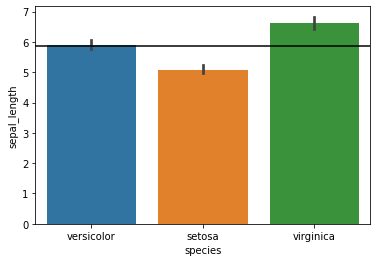

In [102]:
sns.barplot(data = iris_train, y = 'sepal_length', x = 'species')
plt.axhline(y=iris_train.sepal_length.mean(), color='black')
plt.show()

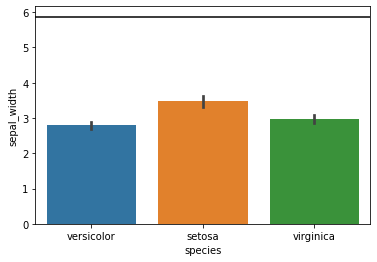

In [103]:
sns.barplot(data = iris_train, y = 'sepal_width', x = 'species')
plt.axhline(y=iris_train.sepal_length.mean(), color='black')
plt.show()

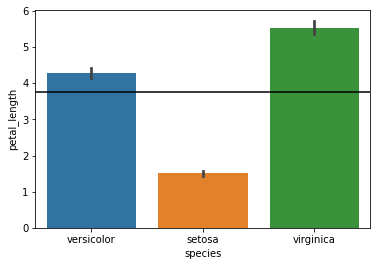

In [105]:
sns.barplot(data = iris_train, y = 'petal_length', x = 'species')
plt.axhline(y=iris_train.petal_length.mean(), color='black')
plt.show()

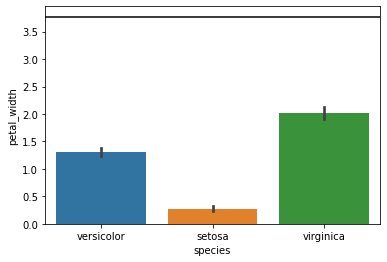

In [106]:
sns.barplot(data = iris_train, y = 'petal_width', x = 'species')
plt.axhline(y=iris_train.petal_length.mean(), color='black')
plt.show()

In [110]:
stats.mannwhitneyu(iris_train[iris_train.species=='virginica'].petal_width, iris_train[iris_train.species=='versicolor'].petal_width)

MannwhitneyuResult(statistic=767.0, pvalue=6.47119166980993e-10)

In [109]:
stats.mannwhitneyu(iris_train[iris_train.species=='virginica'].petal_length, iris_train[iris_train.species=='versicolor'].petal_length)

MannwhitneyuResult(statistic=776.5, pvalue=2.9479835715150625e-10)

In [108]:
stats.mannwhitneyu(iris_train[iris_train.species=='virginica'].sepal_width, iris_train[iris_train.species=='versicolor'].sepal_width)

MannwhitneyuResult(statistic=510.0, pvalue=0.05257259139845694)

In [107]:
stats.mannwhitneyu(iris_train[iris_train.species=='virginica'].sepal_length, iris_train[iris_train.species=='versicolor'].sepal_length)

MannwhitneyuResult(statistic=676.5, pvalue=3.082029196534108e-06)

In [ ]:
sns.pairplot(data=train.drop(columns=['versicolor', 'virginica']), hue='species')

### Bivariate Stats

    Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

    For each measurement type, compute the descriptive statistics for each species.

    For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

    Document takeaways & any actions.

In [35]:
itrain_melt = iris_train.melt(id_vars='species', var_name="measurement", value_name = "value" )

In [37]:
itrain_melt.head()

,species,measurement,value
0,versicolor,sepal_length,5.7
1,setosa,sepal_length,5.5
2,virginica,sepal_length,6.3
3,versicolor,sepal_length,5.7
4,setosa,sepal_length,5.7


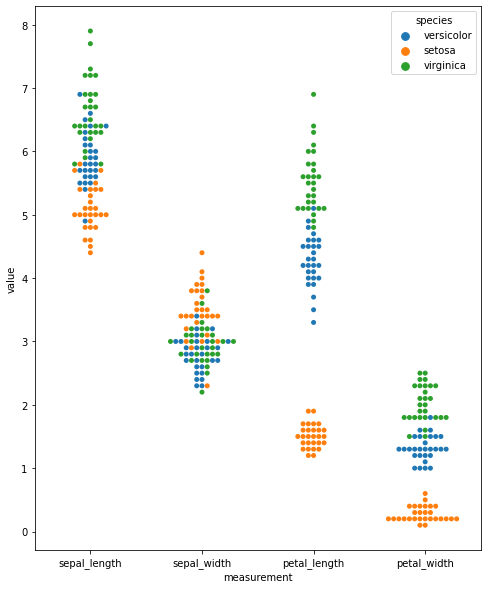

In [33]:
plt.figure(figsize=(8,10))
sns.swarmplot(
x='measurement',
y='value',
hue='species',
data= itrain_melt)

plt.show()

Observation: Setosa has a big difference in petal length and width compare to other 2 species

### Multivariate Stats

    Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

    Visualize two numeric variables by means of the species. Hint: sns.relplot with hue or col

    Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

    Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

    Document takeaways and any actions.

In [148]:
#creating area formulas
iris_train['sepal_area'] = iris_train.sepal_length * iris_train.sepal_width
iris_train['petal_area'] = iris_train.petal_length * iris_train.petal_width

In [149]:
def scatter_by_species(x, y):
    for species, subset in iris_train.groupby('species'):
        plt.scatter(subset[x], subset[y], label=species)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend()

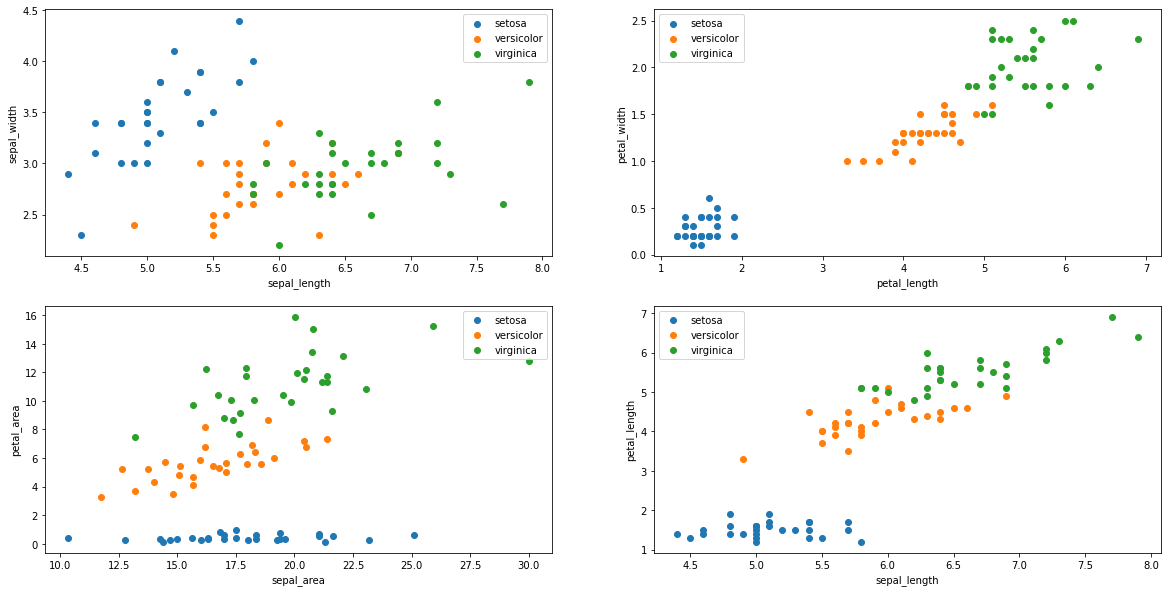

In [150]:
plt.figure(figsize=(20,10))
plt.subplot(2, 2, 1)
scatter_by_species('sepal_length', 'sepal_width')
plt.subplot(2, 2, 2)
scatter_by_species('petal_length', 'petal_width')
plt.subplot(2, 2, 3)
scatter_by_species('sepal_area', 'petal_area')
plt.subplot(2, 2, 4)
scatter_by_species('sepal_length', 'petal_length')

plt.show()


<AxesSubplot:>

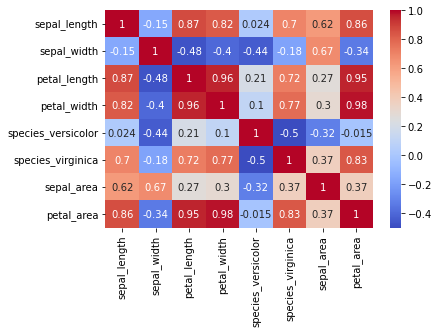

In [151]:
sns.heatmap(iris_train.corr(), cmap='coolwarm', annot=True)

In [145]:
virginica = iris_train[iris_train.species=='virginica']
versicolor = iris_train[iris_train.species=='versicolor']

In [146]:
t, p = stats.ttest_ind(virginica.sepal_length, versicolor.sepal_length)
t,p

(5.656491804882077, 6.024259917536193e-07)

In [147]:
dropped_train = iris_train.drop(columns=['species_versicolor', 'species_virginica'])
dropped_train.head()

,species,sepal_length,sepal_width,petal_length,petal_width,sepal_area,petal_area
79,versicolor,5.7,2.6,3.5,1.0,14.82,3.50
36,setosa,5.5,3.5,1.3,0.2,19.25,0.26
133,virginica,6.3,2.8,5.1,1.5,17.64,7.65
95,versicolor,5.7,3.0,4.2,1.2,17.10,5.04
18,setosa,5.7,3.8,1.7,0.3,21.66,0.51


Takeaways: sepal lengths have a good measure of defining between whether an iris is a virginica or a versicolor.

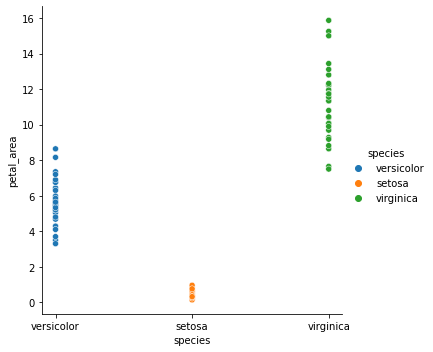

In [139]:
sns.relplot(x='species', y='petal_area', data=dropped_train, hue='species')

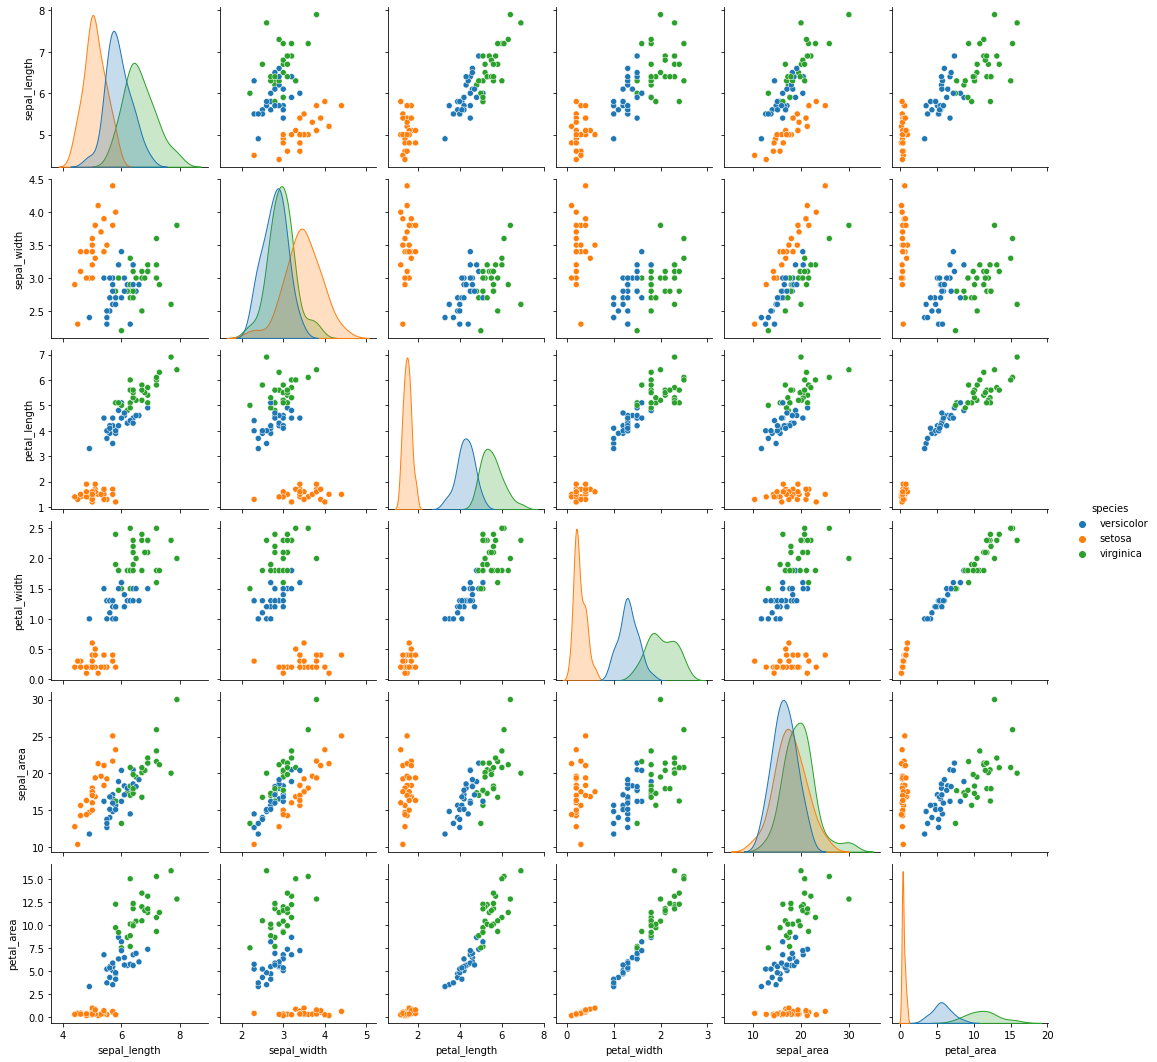

In [143]:
sns.pairplot(data=dropped_train, hue='species')